In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')  #mountingb

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/TEETH'

/content/gdrive/MyDrive/TEETH


In [ ]:
ls

data1/  data1.zip  __MACOSX/


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# #!unzip data1.zip
# #importing required libraries
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt




# clahefilter = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))


# img = cv2.imread('/content/gdrive/MyDrive/TEETH/data1/09556dab-1e80-49eb-90fb-5a6a510ec6b9/before/front.png')
# #img=cv2.imread('/content/gdrive/MyDrive/TEETH/data1/023208b0-5b79-11e9-bdcf-a391d4c1a024/before/left.png')

# ## crop if required 
# #FACE
# x,y,h,w = 550,250,400,300
# # img = img[y:y+h, x:x+w]

# #NORMAL
# # convert to gray
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# grayimg = gray


# GLARE_MIN = np.array([0, 0, 50],np.uint8)
# GLARE_MAX = np.array([0, 0, 225],np.uint8)

# hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# #HSV
# frame_threshed = cv2.inRange(hsv_img, GLARE_MIN, GLARE_MAX)


# #INPAINT
# mask1 = cv2.threshold(grayimg , 220, 255, cv2.THRESH_BINARY)[1]
# result1 = cv2.inpaint(img, mask1, 0.1, cv2.INPAINT_TELEA) 


# clahefilter = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))

# #CLAHE
# claheCorrecttedFrame = clahefilter.apply(grayimg)

# #COLOR 
# lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# lab_planes = cv2.split(lab)
# clahe = cv2.createCLAHE(clipLimit=0.1,tileGridSize=(16,16))
# lab_planes[0] = clahe.apply(lab_planes[0])
# lab = cv2.merge(lab_planes)
# clahe_bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)


# #INPAINT + HSV
# result = cv2.inpaint(img, frame_threshed, 0.1, cv2.INPAINT_TELEA) 


# #INPAINT + CLAHE
# grayimg1 = cv2.cvtColor(clahe_bgr, cv2.COLOR_BGR2GRAY)
# mask2 = cv2.threshold(grayimg1 , 220, 255, cv2.THRESH_BINARY)[1]
# result2 = cv2.inpaint(img, mask2, 0.1, cv2.INPAINT_TELEA) 



# #HSV+ INPAINT + CLAHE
# lab1 = cv2.cvtColor(result, cv2.COLOR_BGR2LAB)
# lab_planes1 = cv2.split(lab1)
# clahe1 = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
# lab_planes1[0] = clahe1.apply(lab_planes1[0])
# lab1 = cv2.merge(lab_planes1)
# clahe_bgr1 = cv2.cvtColor(lab1, cv2.COLOR_LAB2BGR)

# # plt.imshow(img)
# # plt.show()
# # plt.imshow(gray)
# # plt.show()
# # plt.imshow(frame_threshed)
# # plt.show()
# # plt.imshow(clahe_bgr)
# # plt.show()
# plt.imshow( lab)
# plt.show()
# # plt.imshow( result)
# # plt.show()
# # plt.imshow(result1)
# # plt.show()
# # plt.imshow( result2) 
# # plt.show() 
# # plt.imshow(clahe_bgr1)
# # plt.show()


In [ ]:
# org_img=cv2.imread('/content/gdrive/MyDrive/TEETH/data1/023208b0-5b79-11e9-bdcf-a391d4c1a024/before/left.png')
# plt.imshow(cv2.cvtColor(org_img,cv2.COLOR_BGR2RGB))


In [ ]:

# img = cv2.imread ('/content/gdrive/MyDrive/TEETH/data1/09556dab-1e80-49eb-90fb-5a6a510ec6b9/before/front.png', cv2.IMREAD_COLOR)
# # "Almost white" color range
# lower = np.array ([192,192,192])
# upper = np.array ([255,255,255])
# #Create mask
# img_mask = cv2.inRange (img, lower, upper) # Extraction mask for "almost white" only
# img_mask = cv2.bitwise_not (img_mask, img_mask) # Inversion = Extraction mask other than "almost white"
# # Extract all except "almost white" → make "almost white" black
# img = cv2.bitwise_and (img, img, mask = img_mask)

In [ ]:
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [ ]:
# #org_img = cv2.imread('/content/gdrive/MyDrive/TEETH/data1/09556dab-1e80-49eb-90fb-5a6a510ec6b9/before/front.png')
# #org_img=cv2.imread('/content/gdrive/MyDrive/TEETH/data1/023208b0-5b79-11e9-bdcf-a391d4c1a024/before/left.png')
# img=org_img

# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# # noise removal
# kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# # sure background area
# sure_bg = cv2.dilate(opening,kernel,iterations=3)

# # Finding sure foreground area
# dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)

# # Finding unknown region
# sure_fg = np.uint8(sure_fg)
# unknown = cv2.subtract(sure_bg,sure_fg)

# # Marker labelling
# ret, markers = cv2.connectedComponents(sure_fg)

# # Add one to all labels so that sure background is not 0, but 1
# markers = markers+1

# # Now, mark the region of unknown with zero
# markers[unknown==255] = 0

# markers = cv2.watershed(org_img,markers)
# org_img[markers == -1] = [255,0,0]


# plt.imshow(sure_fg)
# plt.show()

# plt.imshow(cv2.cvtColor(org_img,cv2.COLOR_BGR2RGB))
# plt.show()

In [ ]:
# img = cv2.imread('/content/gdrive/MyDrive/TEETH/data1/09556dab-1e80-49eb-90fb-5a6a510ec6b9/before/front.png')
# lower_black = np.array([255,255,255], dtype = "uint16")
# upper_black = np.array([0,0,0], dtype = "uint16")
# black_mask = cv2.inRange(img, lower_black, upper_black)
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))



# Checker

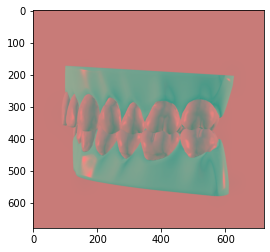

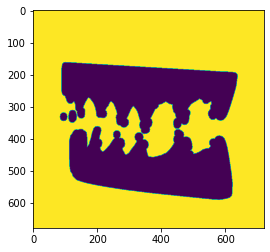

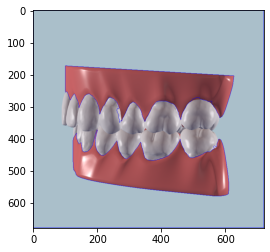

In [ ]:
def checker(pic):
  clahefilter = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))


  img = cv2.imread(pic)


  ## crop if required 
  #FACE
  x,y,h,w = 550,250,400,300
  # img = img[y:y+h, x:x+w]

  #NORMAL
  # convert to gray
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  grayimg = gray


  GLARE_MIN = np.array([0, 0, 50],np.uint8)
  GLARE_MAX = np.array([0, 0, 225],np.uint8)

  hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  #HSV
  frame_threshed = cv2.inRange(hsv_img, GLARE_MIN, GLARE_MAX)


  #INPAINT
  mask1 = cv2.threshold(grayimg , 220, 255, cv2.THRESH_BINARY)[1]
  result1 = cv2.inpaint(img, mask1, 0.1, cv2.INPAINT_TELEA) 



  #CLAHE
  claheCorrecttedFrame = clahefilter.apply(grayimg)

  #COLOR 
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  lab_planes = cv2.split(lab)
  clahe = cv2.createCLAHE(clipLimit=0.1,tileGridSize=(16,16))
  lab_planes[0] = clahe.apply(lab_planes[0])
  lab = cv2.merge(lab_planes)

  plt.imshow( lab)
  plt.show()


  org_img = cv2.imread(pic)
  img=lab
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  # noise removal
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

  # sure background area
  sure_bg = cv2.dilate(opening,kernel,iterations=3)

  # Finding sure foreground area
  dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)

  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg,sure_fg)

  # Marker labelling
  ret, markers = cv2.connectedComponents(sure_fg)

  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1

  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  markers = cv2.watershed(org_img,markers)
  org_img[markers == -1] = [255,0,0]


  plt.imshow(sure_fg)
  plt.show()

  plt.imshow(cv2.cvtColor(org_img,cv2.COLOR_BGR2RGB))
  plt.show()
  
checker('/content/gdrive/MyDrive/TEETH/data1/023208b0-5b79-11e9-bdcf-a391d4c1a024/before/left.png')

# Continue

In [ ]:
# checker('/content/gdrive/MyDrive/TEETH/data1/00597620-57b9-11e9-9512-af5c5ae1b2d8/before/bottom.png')

In [ ]:
# checker('/content/gdrive/MyDrive/TEETH/data1/00597620-57b9-11e9-9512-af5c5ae1b2d8/before/top.png')

In [ ]:
# checker('/content/gdrive/MyDrive/TEETH/data1/023208b0-5b79-11e9-bdcf-a391d4c1a024/before/front.png')

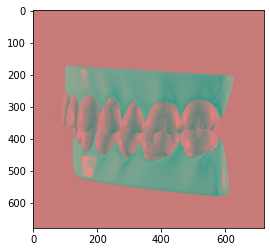

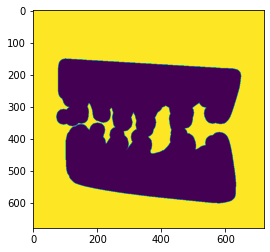

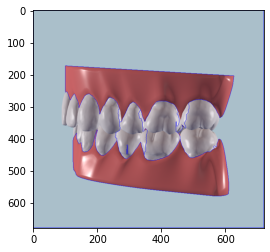

In [ ]:

# img = cv2.imread('/content/gdrive/MyDrive/TEETH/data1/023208b0-5b79-11e9-bdcf-a391d4c1a024/before/left.png')
# image = cv2.resize(img, (1800, 1800))
# alpha=1.5
# beta=20
# new_image=cv2.addWeighted(image,alpha,np.zeros(image.shape, image.dtype),0,beta)


In [ ]:
# plt.imshow(new_image)
# plt.show()
# print('After')
# plt.imshow(img)
# plt.show()
# print('Before')

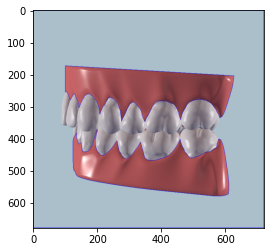

In [ ]:
def checker(pic):
  clahefilter = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))


  img = cv2.imread(pic)
  img[np.where((img==[0,0,0]).all(axis=2))] = [215,215,205]


  ## crop if required 
  #FACE
  x,y,h,w = 550,250,400,300
  # img = img[y:y+h, x:x+w]

  #NORMAL
  # convert to gray
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  grayimg = gray


  GLARE_MIN = np.array([0, 0, 50],np.uint8)
  GLARE_MAX = np.array([0, 0, 225],np.uint8)

  hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  #HSV
  frame_threshed = cv2.inRange(hsv_img, GLARE_MIN, GLARE_MAX)


  #INPAINT
  mask1 = cv2.threshold(grayimg , 220, 255, cv2.THRESH_BINARY)[1]
  result1 = cv2.inpaint(img, mask1, 0.1, cv2.INPAINT_TELEA) 



  #CLAHE
  claheCorrecttedFrame = clahefilter.apply(grayimg)

  #COLOR 
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  lab_planes = cv2.split(lab)
  clahe = cv2.createCLAHE(clipLimit=0.1,tileGridSize=(16,16))
  lab_planes[0] = clahe.apply(lab_planes[0])
  lab = cv2.merge(lab_planes)

  # plt.imshow( lab)
  # plt.show()

  #lab = cv2.resize(lab, (1800, 1800)) 
  alpha=1.5
  beta=20
  lab=cv2.addWeighted(lab,alpha,np.zeros(lab.shape, lab.dtype),0,beta)

  # plt.imshow(lab)
  # plt.show()


  org_img = cv2.imread(pic)
  img=lab
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  # noise removal
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

  # sure background area
  sure_bg = cv2.dilate(opening,kernel,iterations=3)

  # Finding sure foreground area
  dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)

  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg,sure_fg)

  # Marker labelling
  ret, markers = cv2.connectedComponents(sure_fg)

  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1

  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  markers = cv2.watershed(org_img,markers)
  org_img[markers == -1] = [255,0,0]


  # plt.imshow(sure_fg)
  # plt.show()

  plt.imshow(cv2.cvtColor(org_img,cv2.COLOR_BGR2RGB))
  plt.show()
  
checker('/content/gdrive/MyDrive/TEETH/data1/023208b0-5b79-11e9-bdcf-a391d4c1a024/before/left.png')

In [ ]:
path = "/content/gdrive/MyDrive/TEETH/data1/"
for folder_name in os.listdir(path):
  for sub_folder_name in os.listdir(path+folder_name):
    if sub_folder_name == "before":
      for image in os.listdir(path+folder_name+"/"+"before"):
        checker(path+folder_name+"/"+"before"+"/"+image)

Output hidden; open in https://colab.research.google.com to view.